<a href="https://colab.research.google.com/github/MinoruNakazawa/ubiq_ex/blob/master/ABEP4_c04_s2018_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習　深層学習編1

## データ準備

In [0]:
!rm -rf ai-adv-data
!git clone https://github.com/makaishi2/ai-adv-data.git

Cloning into 'ai-adv-data'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 56.15 MiB | 9.65 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [0]:
import sys

print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


## matplotlib日本語化処理
カーネルをアクティブにするたびに実行する必要があるので、Notebook開始時に下記のセルを必ず実行して下さい。

In [0]:
import os
if not os.path.exists('/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf'):
    !cp ai-adv-data/ipaexg00201/ipaexg.ttf /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf
    !echo 'font.family : IPAexGothic' >> /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc
    print('IPA font copied!')

cp: cannot stat 'ai-adv-data/ipaexg00201/ipaexg.ttf': No such file or directory
/bin/bash: /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc: No such file or directory
IPA font copied!


## カーネル再起動
上記のスクリプトが動いたとき('IPA font copied!'と表示されたとき)は、スクリプト実行後にカーネル再起動を行って下さい。

## 実習1 Keras入門

### 共通処理
2つのモデル作成パターンを実習しますが、まず共通な処理のコーディングを行います

In [0]:
# 必要ライブラリのロード
#
# (備考)実行時に以下のワーニングが表示されますが、実害はないので気にしなくて結構です
#
# Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated.
#
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from keras.utils import np_utils

In [0]:
# ダミーデータ作成
# 本当はここで学習データの作成をしますが、今はモデル作成の方法の実習なので、ダミーデータで済ませます。
data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 1))
labels = np_utils.to_categorical(labels, 10)

### Sequentialモデル
ここからは実際のモデル作成です。  
最初に簡単なSequentialモデルの実習から行います。

In [0]:

!apt-get install  graphviz
!pip install graphviz
!pip install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
  Using cached https://files.pythonhosted.org/packages/60/bf/62567830b700d9f6930e9ab6831d6ba256f7b0b730acb37278b0ccdffacf/pydotplus-2.0.2.tar.gz
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [0]:
# モデル定義
# モデル定義は次の4行でおしまいです。
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

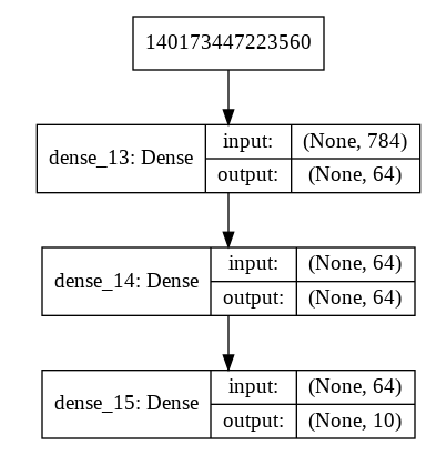

In [0]:
# モデルのグラフ化
# 作ったモデルをグラフ表示してみます。
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plot_model(model, to_file='sample-model1.png', show_shapes=True, show_layer_names=True)
im = Image.open('sample-model1.png')
plt.figure(figsize=(8,8))
plt.axis('off')
_ = plt.imshow(np.array(im))

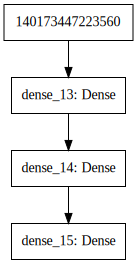

In [0]:
print(model)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Functional API
次にFunction APIによる方法です。

In [0]:
# 必要ライブラリのロード
from keras.layers import Input
from keras.models import Model

In [0]:
# モデル定義
# 上(前)のノードの終点を表す変数を、下(後ろ)のノードの起点としてつないでいくイメージです。
inputs = Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
y = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(y)

#Modelを定義して入力と出力を接続します
model = Model(inputs=inputs, outputs=predictions)

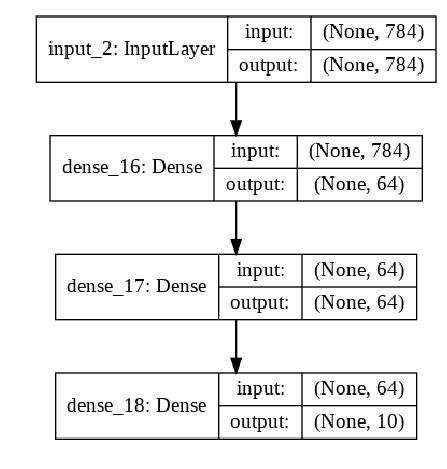

In [0]:
# モデルのグラフ化
# 上と同じように作ったモデルをグラフ表示してみます。
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plot_model(model, to_file='sample-model1.png', show_shapes=True, show_layer_names=True)
im = Image.open('sample-model1.png')
plt.figure(figsize=(8,8))
plt.axis('off')
_ = plt.imshow(np.array(im))

### 後続処理
(参考)ダミーデータなので意味はないのですが、本来であればこの後、モデルのコンパイル、学習と続きます。

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels)

Epoch 1/1
1000/1000 [==============================] - 0s 371us/step - loss: 2.3609 - acc: 0.0960


## 実習2 MNISTによる機械学習

今度はMNISTという手書き数字データを使って実際に機械学習を行い、分類を行ってみます。

In [0]:
# 必要ライブラリのロード
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

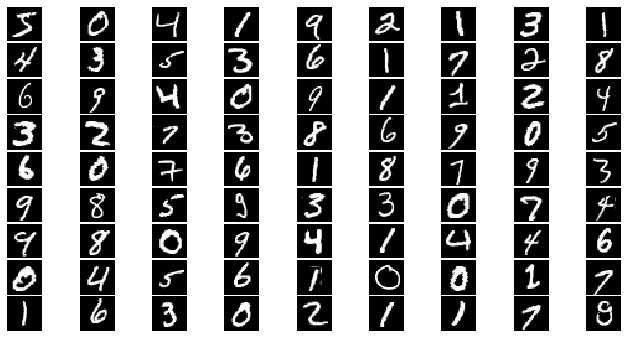

In [0]:
#Kerasの関数でデータの読み込み。データをシャッフルして学習データと検証データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [0]:
# 学習用データの作成
# 読み込んだ手書き文字イメージデータを、機械学習の入力にできるよう整形します。
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


print( '訓練サンプル数: ', x_train.shape[0])
print( '検証サンプル数: ',x_test.shape[0])

訓練サンプル数:  60000
検証サンプル数:  10000


In [0]:
# 正解データの加工
# 元は 0,1,.. 9の値だったものを10次元のベクトルに変換します。

# 加工前
print('加工前')
print(y_train[:5])

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

# 加工後
print('加工後')
print(y_train[:5])

加工前
[5 0 4 1 9]
加工後
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
# モデルの定義
# 必要ライブラリのロード
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

# 簡単なモデルなのでSequentialモデルを使います
model = Sequential()

# 隠れ層1の定義
# Dense: 全結合
# 活性化関数: ReLU関数
# 入力: 784次元
# 出力: 512次元
model.add(Dense(512, activation='relu', input_shape=(784,)))

# 20%をドロップアウト
model.add(Dropout(0.2))

# 隠れ層2の定義
# Dense: 全結合
# 活性化関数: ReLU関数
# 入力: 512次元
# 出力: 512次元
model.add(Dense(512, activation='relu'))

# 20%をドロップアウト
model.add(Dropout(0.2))

# 出力層
# Dense: 全結合
# 活性化関数: softmax
# 入力: 512次元
# 出力 10次元
model.add(Dense(10, activation='softmax'))

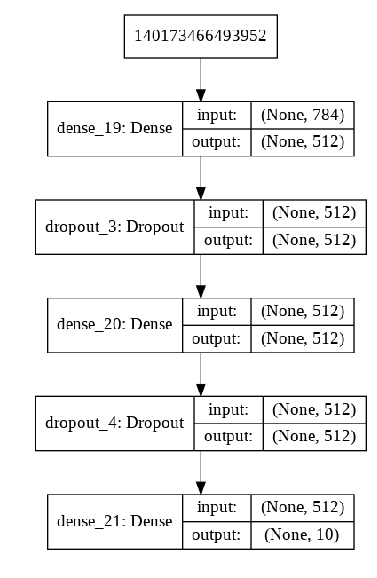

In [0]:
# 作ったモデルをグラフ表示してみます。
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plot_model(model, to_file='sample-model1.png', show_shapes=True, show_layer_names=True)
im = Image.open('sample-model1.png')
plt.figure(figsize=(10,10))
plt.axis('off')
_ = plt.imshow(np.array(im))

In [0]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# 学習の単位
batch_size = 128

# 繰り返し回数
epochs = 10

# モデルの学習
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2444 - acc: 0.9245 - val_loss: 0.1359 - val_acc: 0.9584
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1033 - acc: 0.9683 - val_loss: 0.0834 - val_acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0763 - acc: 0.9773 - val_loss: 0.0773 - val_acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0603 - acc: 0.9813 - val_loss: 0.0763 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0497 - acc: 0.9846 - val_loss: 0.0796 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0421 - acc: 0.9877 - val_loss: 0.0802 - val_acc: 0.9788
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0375 - acc: 0.9891 - val_loss: 0.0883 - val_acc

In [0]:
# 検証データに対する予測値の取得
y_predict = model.predict(x_test)

# 予測値を頭から5行表示
print(y_predict[:5])

# 正解データを頭から5行表示
print(y_test[:5])

[[6.3359650e-20 1.1329194e-15 5.3926258e-14 1.9016089e-11 1.3695902e-20
  4.4761658e-17 9.8495996e-28 1.0000000e+00 2.4989010e-16 1.3883328e-12]
 [1.1269757e-22 4.2453516e-13 1.0000000e+00 2.9271655e-17 1.5174189e-31
  2.8371378e-25 3.5122864e-23 2.8754393e-23 8.3825142e-23 3.6705480e-33]
 [1.6674123e-14 1.0000000e+00 2.6540450e-09 7.7701701e-13 6.7941150e-09
  1.0365485e-11 1.7984826e-10 2.1582636e-08 7.9433332e-10 1.8456054e-13]
 [9.9999928e-01 4.4793656e-13 6.2578849e-08 1.0603114e-11 6.3668371e-10
  7.5624680e-09 7.9181310e-09 8.3543846e-08 1.0209881e-10 4.6142418e-07]
 [5.0335207e-14 2.1407707e-14 9.3046197e-14 3.4586899e-16 9.9999988e-01
  4.6595631e-14 1.4484620e-15 1.6181767e-08 3.6917592e-14 1.4751122e-07]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


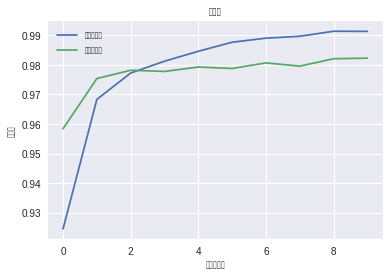

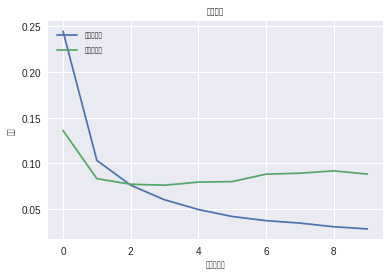

In [0]:
# 正答率と損失関数の値の推移をグラフ化します、
# 学習時の正答率などの情報は、history変数にすべて記録されています。

# 正答率の推移
plt.figure(figsize=(6,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('正答率')
plt.ylabel('正答率')
plt.xlabel('繰返し回数')
plt.xticks(np.arange(0, 10, 2))
plt.legend(['訓練データ', '検証データ'], loc='upper left')
plt.show()

# 損失関数の推移
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('損失関数')
plt.ylabel('損失')
plt.xlabel('繰返し回数')
plt.xticks(np.arange(0, 10, 2))
plt.legend(['訓練データ', '検証データ'], loc='upper left')
plt.show()

## 【問題1】  
<span style="color:blue">**グラフから読み取れること**</span>  
2つのグラフを見て気付いたことを書いて下さい


In [0]:
# (回答)
#
#
#

##  実習3 Autoencoder

In [0]:
# 必要ライブラリのロード
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
# ニューラルネットの定義

# 圧縮後の次元数
encoding_dim = 32  

# 入力層の次元数
input_img = Input(shape=(784,))

# 入力層 -> 隠れ層の定義
# Dense: 全結合
# 784次元 -> 32次元
# 活性化関数: ReLU
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 隠れ層 -> 出力層の定義
# Dense: 全結合
# 32次元 -> 784次元
# 活性化関数: sigmoid
decoded = Dense(784, activation='sigmoid')(encoded)

# autoencoder全体のモデル定義
# 入力と出力が引数となります。
autoencoder = Model(input_img, decoded)

# 入力層 -> 隠れ層の部分ネットワーク定義
encoder = Model(input_img, encoded)

# 隠れ層 -> 出力層の部分ネットワーク定義
# このネットワークの入力はまだ定義されていないので、新たに32次元の入力データを定義
encoded_input = Input(shape=(encoding_dim,))

# decoderのレイヤーはautoencoderの一番最後のレイヤーを使う
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# モデルのコンパイル
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

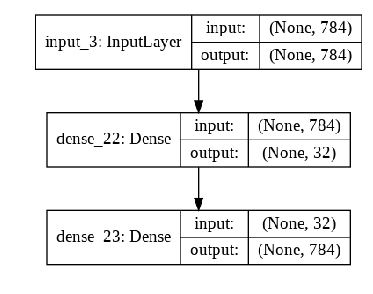

In [0]:
# モデルのグラフ表示
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plot_model(autoencoder, to_file='auto-encode-model.png', show_shapes=True, show_layer_names=True)
im = Image.open('auto-encode-model.png')
plt.figure(figsize=(6,6))
plt.axis('off')
_ = plt.imshow(np.array(im))

In [0]:
# データロード
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
# トレーニングデータ生成
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# 学習
# autoencoderなので、入力データと教師データは同一のものを使う 
# (普通は y_train, y_testとなるところが x_train, x_testになっている点に注意)
history2 = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3650 - val_loss: 0.2705
Epoch 2/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.2626 - val_loss: 0.2506
Epoch 3/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.2392 - val_loss: 0.2261
Epoch 4/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2186 - val_loss: 0.2094
Epoch 5/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2049 - val_loss: 0.1982
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1949 - val_loss: 0.1893
Epoch 7/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1869 - val_loss: 0.1820
Epoch 8/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1803 - val_loss: 0.1762
Epoch 9/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1748 - val_loss: 0.1709
Epoch

In [0]:
# 検証データをエンコードした配列
# (このデータは学習には使っていない点に注意して下さい)
# エンコード結果は元の784次元に対して32次元に圧縮されています。
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)

# エンコードしたデータを再度デコードした配列
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


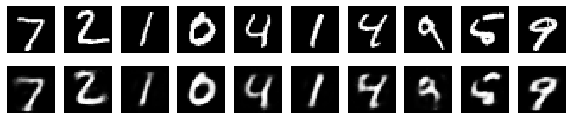

In [0]:
# 検証データに対する、元データとデコード結果の比較
import matplotlib.pyplot as plt

# 分類器が分類すべきクラス数
n = 10 
plt.figure(figsize=(10, 2))
for i in range(n):
    # 元イメージの表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 再構成されたイメージの表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 【問題2】  
<span style="color:blue">**autoencoderの損失関数値の推移をグラフ表示して下さい**</span>    
損失関数値の履歴は、history2.history に記録されています。  
キー値は、訓練データ: "loss"、検証データ: "val_loss"です。  
前の実習のコードを参考にして下さい。  

In [0]:
# 回答のコードを以下に記述し、実行して下さい
#


## 実習4 CNNによるCIFAR-10の画像分類

### 必要モジュールの導入

### 必要ライブラリのロード

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model
from PIL import Image

### パラメータ定義

In [0]:
# データ学習訓練の試行回数
# 注意　この実習は学習に大変時間がかかります(1epochあたり260秒)
# 授業では nb_epoch = 2で学習します。
# 授業後に nb_epoch=50で学習を実施して下さい
# nb_epoch = 100
nb_epoch = 50
# nb_epoch = 5
# nb_epoch = 2

# 1回の学習で何枚の画像を使うか
batch_size = 128

# 識別ラベル数
nb_classes = 10

# 入力画像の次元
img_rows, img_cols = 32, 32

# チャネル数（RGBなので3）
img_channels = 3

# 画像ラベル
label = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

### サンプルイメージ表示関数の定義
ここでは関数を定義しているだけなので、まだ結果は表示されません

In [0]:
def plot_cifar10(x, y):
    plt.figure(figsize=(10,10))
    nclasses = 10
    pos = 1
    for targetClass in range(nclasses):
        targetIdx = []
        for i in range(len(y)):
            if y[i][0] == targetClass:
                targetIdx.append(i)
        np.random.shuffle(targetIdx)
        for idx in targetIdx[:10]:
            img = Image.fromarray(x[idx])
            plt.subplot(10, 10, pos)
            plt.imshow(img)
            plt.axis('off')
            pos += 1
    plt.show()

### CIFAR-10データをロード

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1138s 7us/step


### ランダムに画像をプロット

(32, 32, 3)
<class 'numpy.ndarray'>


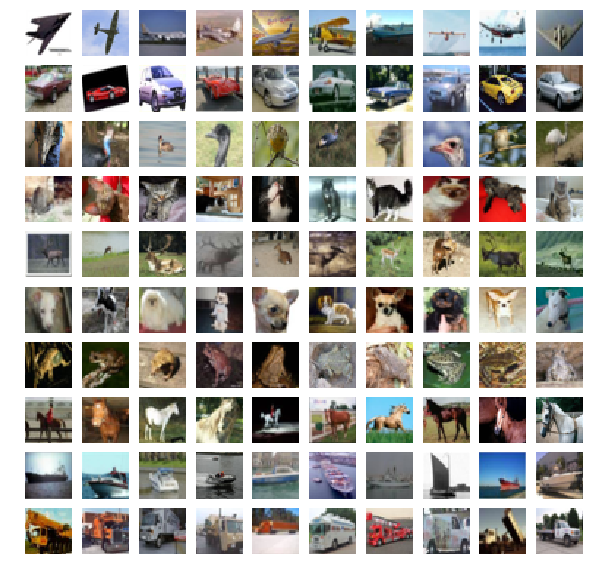

In [0]:
print(x_train[0].shape)
print(type(x_train[0]))
plot_cifar10(x_train, y_train)

### 機械学習用にデータ変換

In [0]:
# 画素値を0-1に変換
X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

# クラスラベル（0-9）をone-hotエンコーディング形式に変換
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [0]:
# 必要ライブラリのロード
from keras.layers import Input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

### モデル定義

In [0]:
def cnn_model(X_train, nb_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

### モデルの生成

In [0]:
# モデル
model = cnn_model(X_train, nb_classes)

### ニューラルネットのグラフ表示

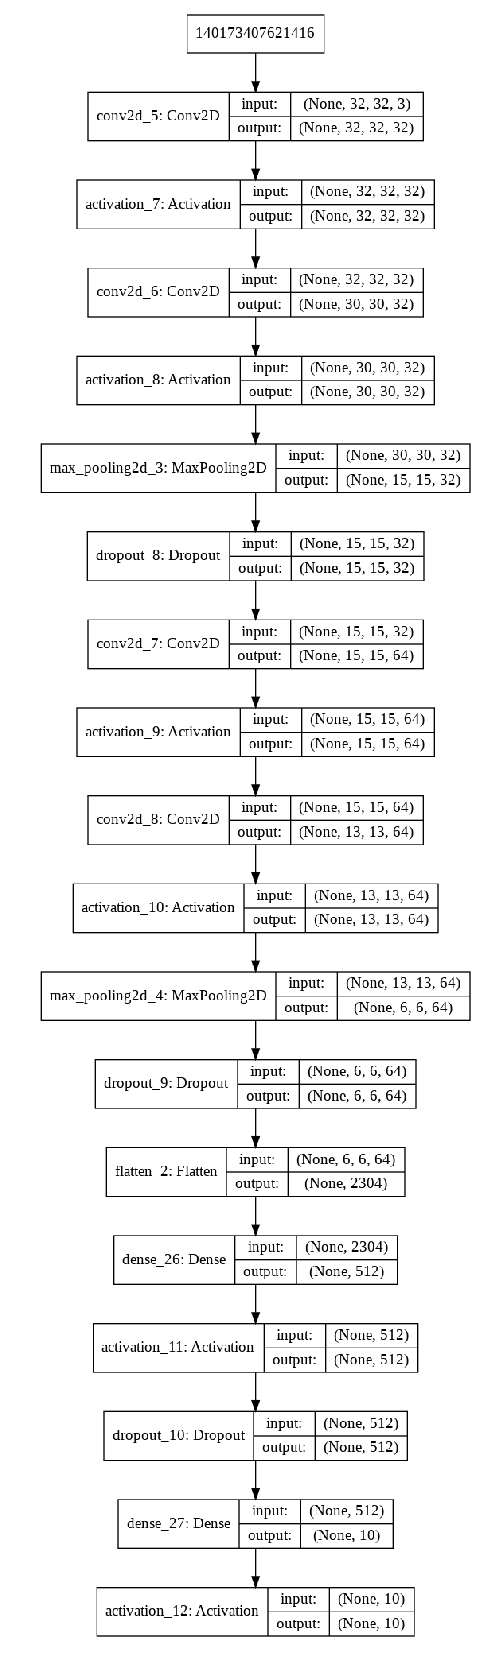

In [0]:
%matplotlib inline
plot_model(model, to_file='keras-cifar10-model.png', show_shapes=True, show_layer_names=True)
im = Image.open('keras-cifar10-model.png')
plt.figure(figsize=(30,30))
plt.axis('off')
_ = plt.imshow(np.array(im))

### 学習の実施

In [0]:
history3 = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=1,
    validation_data=(X_test, Y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.6298 - acc: 0.4005 - val_loss: 1.2309 - val_acc: 0.5592
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.1975 - acc: 0.5723 - val_loss: 1.0386 - val_acc: 0.6275
Epoch 3/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.0289 - acc: 0.6356 - val_loss: 0.9160 - val_acc: 0.6766
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.9247 - acc: 0.6740 - val_loss: 0.8622 - val_acc: 0.6991
Epoch 5/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.8497 - acc: 0.7028 - val_loss: 0.7667 - val_acc: 0.7321
Epoch 6/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7804 - acc: 0.7259 - val_loss: 0.7206 - val_acc: 0.7529
Epoch 7/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7360 - acc: 0.7444 - val_loss: 0.

## 【宿題】  
<span style="color:blue">**(nb_epoch = 50 で再実行)**</span>  
この学習は時間がかかりすぎるので、授業時は繰り返し回数=2で実施します。  
授業後に、ここから先の処理を繰り返し回数(情報のセルのnb_epochの値)を50にして再実行して下さい。  
(おそらく3時間半程度かかります)  
実行結果は最終回の授業で使いますので、必ず実行するようにして下さい。

In [0]:
### モデルの評価

In [0]:
# 検証データ(学習データと別のもの)に対して損失と正答率がどうなったかを計算する
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print('損失(検証データ): ', loss)
print('正答率(検証データ): ', acc)

損失(検証データ):  0.652311868429184
正答率(検証データ):  [0.400520000038147, 0.57234, 0.6356000000190735, 0.6739599999618531, 0.702780000038147, 0.7259200000190735, 0.74444, 0.7572199999618531, 0.770400000038147, 0.7866400000190735, 0.7927599999809265, 0.80136, 0.8107199999809265, 0.819119999961853, 0.8271199999809266, 0.8311600000381469, 0.8388799999809265, 0.84192, 0.8498599999809265, 0.85226, 0.8556400000190735, 0.8609399999809265, 0.8639599999809265, 0.866639999961853, 0.87122, 0.873260000038147, 0.8749999999809265, 0.87954, 0.8811599999809265, 0.8817599999618531, 0.8854999999809265, 0.88584, 0.8889799999809265, 0.8911999999809265, 0.8942400000190734, 0.890819999961853, 0.8967400000190735, 0.896360000038147, 0.8985399999618531, 0.90048, 0.9041400000190735, 0.90228, 0.904259999961853, 0.9046399999809265, 0.9059599999809265, 0.903720000038147, 0.9057399999618531, 0.9121999999809265, 0.90616, 0.90802]


### 学習履歴のグラフ化

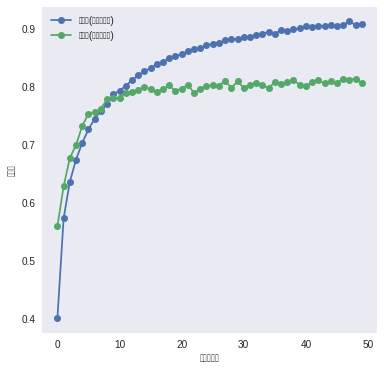

In [0]:
# 正答率グラフの表示

# acc: 学習データに対する正答率
acc = history3.history['acc']

# val_acc: 検証データに対する正答率
val_acc = history3.history['val_acc']
nb_epoch = len(acc)

plt.figure(figsize=(6,6))
plt.plot(range(nb_epoch), acc, marker='o', label='正答率(学習データ)')
plt.plot(range(nb_epoch), val_acc, marker='o', label='正答率(評価データ)')

plt.legend(loc='best', fontsize=10)
plt.grid()

plt.xlabel('繰返し回数')
plt.ylabel('正答率')
plt.show()

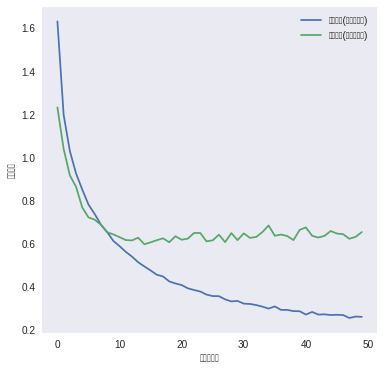

In [0]:
# 損失関数グラフの表示

# loss: 学習データに対する損失関数
loss = history3.history['loss']

# val_loss: 検証データに対する損失関数
val_loss = history3.history['val_loss']

nb_epoch = len(loss)

plt.figure(figsize=(6,6))
plt.plot(range(nb_epoch), loss, marker='x', label='損失関数(学習データ)')
plt.plot(range(nb_epoch), val_loss, marker='x', label='損失関数(評価データ)')

plt.legend(loc='best', fontsize=10)
plt.grid()

plt.xlabel('繰返し回数')
plt.ylabel('損失関数')
plt.show()

### 予測が間違っていた画像の表示

index=  10 plane -> deer


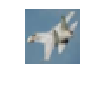

index=  24 dog -> deer


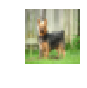

index=  35 bird -> ship


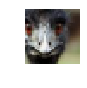

index=  52 plane -> cat


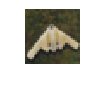

index=  57 horse -> cat


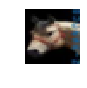

index=  58 deer -> dog


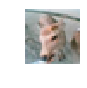

index=  59 frog -> deer


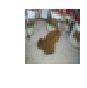

index=  61 cat -> dog


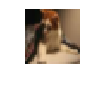

index=  63 cat -> truck


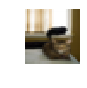

index=  70 bird -> plane


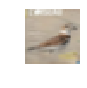

In [0]:
# 予測が間違っていたデータのリストアップ
max_len = 128
x_test_sub = X_test[0:max_len]
y_predict = model.predict_classes(x_test_sub,max_len)
y_answer = [y[0] for y in y_test[:max_len]]
check = [[index, y_answer[index], y_predict[index]] 
    for index in range(max_len) if y_answer[index] != y_predict[index]]

# 画像の表示
count = min(10, len(check))
for index in range(count):
    item = check[index]
    print('index= ', item[0], label[item[1]], '->', label[item[2]])
    plt.figure(figsize=(1,1))
    plt.axis('off')
    img = np.asarray(X_test[item[0]])
    plt.imshow(img)
    plt.show()